<a href="https://colab.research.google.com/github/DiegoOCruz/Artificial-Clusteriza-o/blob/main/AT_Intelig%C3%AAncia_Artificial_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Bibliotecas básicas ---
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# --- Kaggle ---
import kagglehub
from kagglehub import KaggleDatasetAdapter

# --- Datasets ---
from sklearn.datasets import (
    make_swiss_roll,
    fetch_20newsgroups,
    fetch_olivetti_faces,
    fetch_openml
)

# --- Pré-processamento ---
from sklearn.preprocessing import StandardScaler

# --- Clustering ---
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# --- Avaliação de clustering ---
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# --- Redução de dimensionalidade ---
from sklearn.decomposition import PCA, TruncatedSVD, NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE

# --- Text processing ---
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


#Questão 1
Avalie o dataset Mall Customer Segmentation Data e, baseando-se no funcionamento do k-means, determine qual(is) o(s) objetivo(s) de uma tarefa de agrupamento para esse conjunto de dados.

#Resposta:
O objetivo da aplicação de K-Means no dataset Mall Customer Segmentation Data é agrupar os clientes em segmentos com características semelhantes em termos de idade, renda e comportamento de gastos. Isso permite identificar perfis de consumidores distintos e auxilia na definição de estratégias de marketing direcionadas, como campanhas específicas para clientes de alto gasto, retenção de clientes de baixo gasto, ou fidelização de clientes com alto potencial de consumo.

#Questão 2
Escreva um código em python para aplicar o k-means sobre o dataset Mall Customer Segmentation Data. Apresente avalie os resultados obtidos. Em que situações o k-means pode falhar? Explique.
#Resposta:
Situações em que o K-Means pode falhar:

Clusters não esféricos:
K-Means assume que os grupos são circulares (ou convexos). Se os dados tiverem formas mais complexas (ex.: em meia-lua), ele não separa bem.

Sensibilidade a outliers:
pontos muito distantes podem puxar o centróide.

Escalas diferentes nos atributos:
se não houver normalização, atributos com valores maiores dominam o agrupamento.

Clusters de tamanhos muito diferentes:
pode distorcer os resultados, já que o K-Means tende a criar grupos de tamanho parecido.

In [ ]:
df_mall = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "vjchoudhary7/customer-segmentation-tutorial-in-python",
    "Mall_Customers.csv"
)
print("\n=== Mall Customers ===")
print(df_mall.head())
#print(df_mall.value_counts())

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.

=== Mall Customers ===
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40



Centroides dos clusters:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


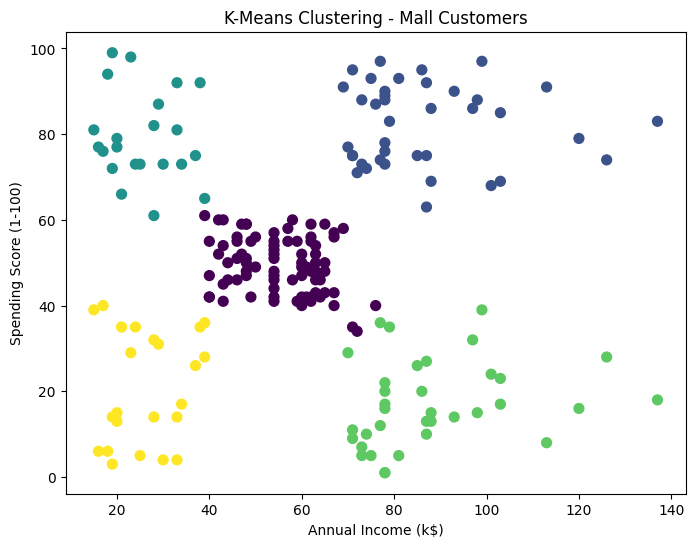

In [ ]:
# Selecionar atributos relevantes (Renda e Spending Score)
X = df_mall[["Annual Income (k$)", "Spending Score (1-100)"]]

# Normalizar dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_mall["Cluster"] = kmeans.fit_predict(X_scaled)

print("\nCentroides dos clusters:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualização dos clusters
plt.figure(figsize=(8,6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"],
            c=df_mall["Cluster"], cmap="viridis", s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering - Mall Customers")
plt.show()


#Questão 3
Redução de Dimensionalidade e Quantização Vetorial

Use o k-means para fazer uma quantização vetorial sobre os dados do dataset Mall Customer Segmentation Data. Apresente os resultados.
Aplique o PCA para determinar as componentes principais do dataset Mall Customer Segmentation Data. Apresente os resultados.
Escreva um código em Python que permita comparar os resultados obtidos nos itens (a) e (b).

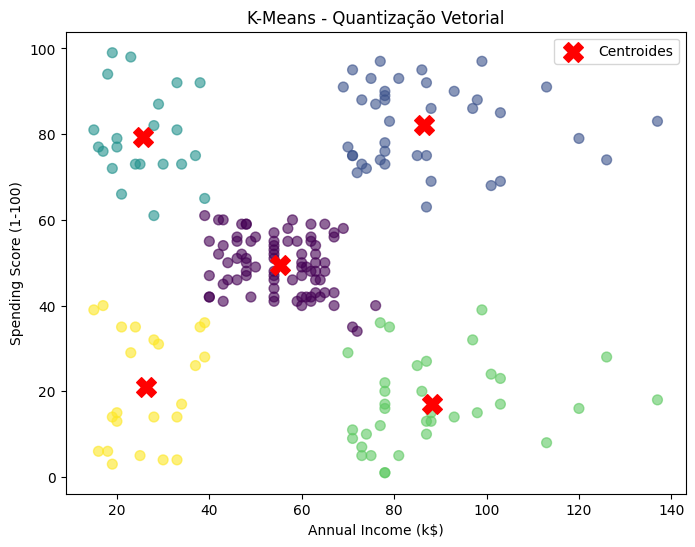


Explained Variance Ratio (PCA): [0.50495142 0.49504858]


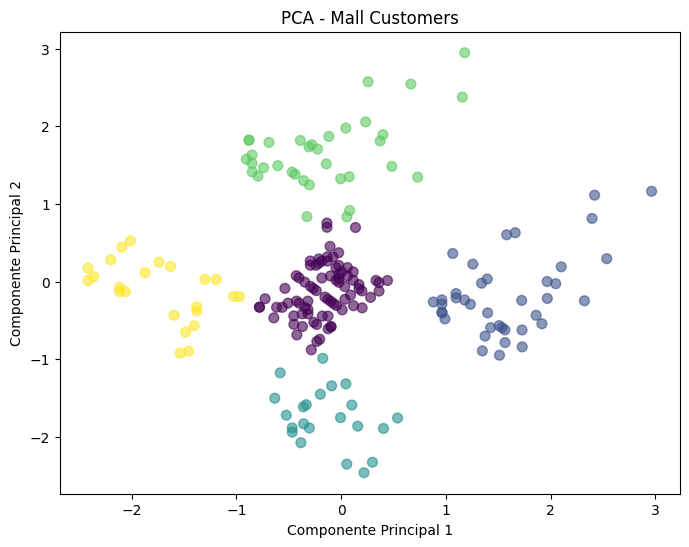

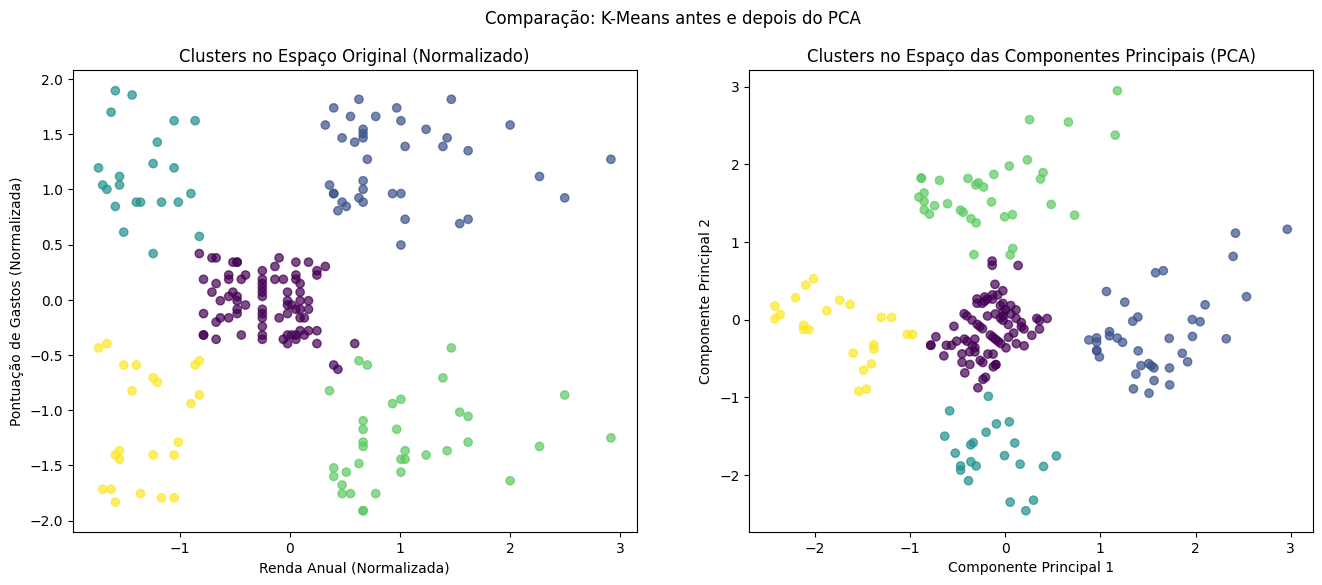

In [ ]:
# (a) Quantização Vetorial usando K-Means

labels_kmeans = kmeans.fit_predict(X_scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Gráfico quantização vetorial
plt.figure(figsize=(8,6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"],
            c=labels_kmeans, cmap="viridis", alpha=0.6, s=50)
plt.scatter(centroids[:,0], centroids[:,1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means - Quantização Vetorial")
plt.legend()
plt.show()


# (b) PCA - Componentes Principais

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained Variance Ratio (PCA):", pca.explained_variance_ratio_)

# Gráfico PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap="viridis", alpha=0.6, s=50)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Mall Customers")
plt.show()


# (c) Comparação - Sobreposição dos resultados

# Cria uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Clusters no espaço original (normalizado)
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.7)
axes[0].set_title('Clusters no Espaço Original (Normalizado)')
axes[0].set_xlabel('Renda Anual (Normalizada)')
axes[0].set_ylabel('Pontuação de Gastos (Normalizada)')

# Gráfico 2: Clusters no espaço do PCA
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.7)
axes[1].set_title('Clusters no Espaço das Componentes Principais (PCA)')
axes[1].set_xlabel('Componente Principal 1')
axes[1].set_ylabel('Componente Principal 2')

plt.suptitle('Comparação: K-Means antes e depois do PCA')
plt.show()

#Questão 4
Agglomerative Clustering

Aplique o Agglomerative Clustering para determinar agrupamentos no datasetMall Customer Segmentation Dataajustando os parâmetros de linkage para:

* ward
* average
* single
* complete

#Resposta:
* ward
  * O "ward" funciona tentando minimizar a variância dentro de um cluster quando ele une dois grupos. O resultado é que ele prefere juntar clusters que não aumentem muito a "espalhamento" interno do novo grupo. Por isso, ele é excelente para encontrar clusters compactos, como os deste dataset, e seu resultado é muito semelhante ao do K-Means.
* average
  *  O método "complete" (ou máximo) considera a distância entre os dois pontos mais distantes de cada cluster. Ao minimizar essa distância máxima, ele garante que os clusters formados sejam sempre muito coesos e não se "alonguem" para alcançar outros pontos, resultando em grupos densos.
* single
  * Como o nome sugere, o "average" calcula a média de todas as distâncias entre os pontos de dois clusters para decidir a proximidade. Ele é um meio-termo: menos sensível a outliers que o "complete" e não sofre do "efeito corrente" do "single", tornando-o uma opção bastante robusta.
* complete
  * O "single" (ou mínimo) considera a distância entre os dois pontos mais próximos entre dois clusters. Isso cria o chamado "efeito corrente" (chaining effect). Basta que um único ponto de um grupo esteja perto de um ponto de outro grupo para que ambos sejam unidos. Isso faz com que ele seja ótimo para encontrar clusters com formatos complexos e não esféricos, mas péssimo para dados como os do Mall Customers, que possuem agrupamentos naturalmente globulares.

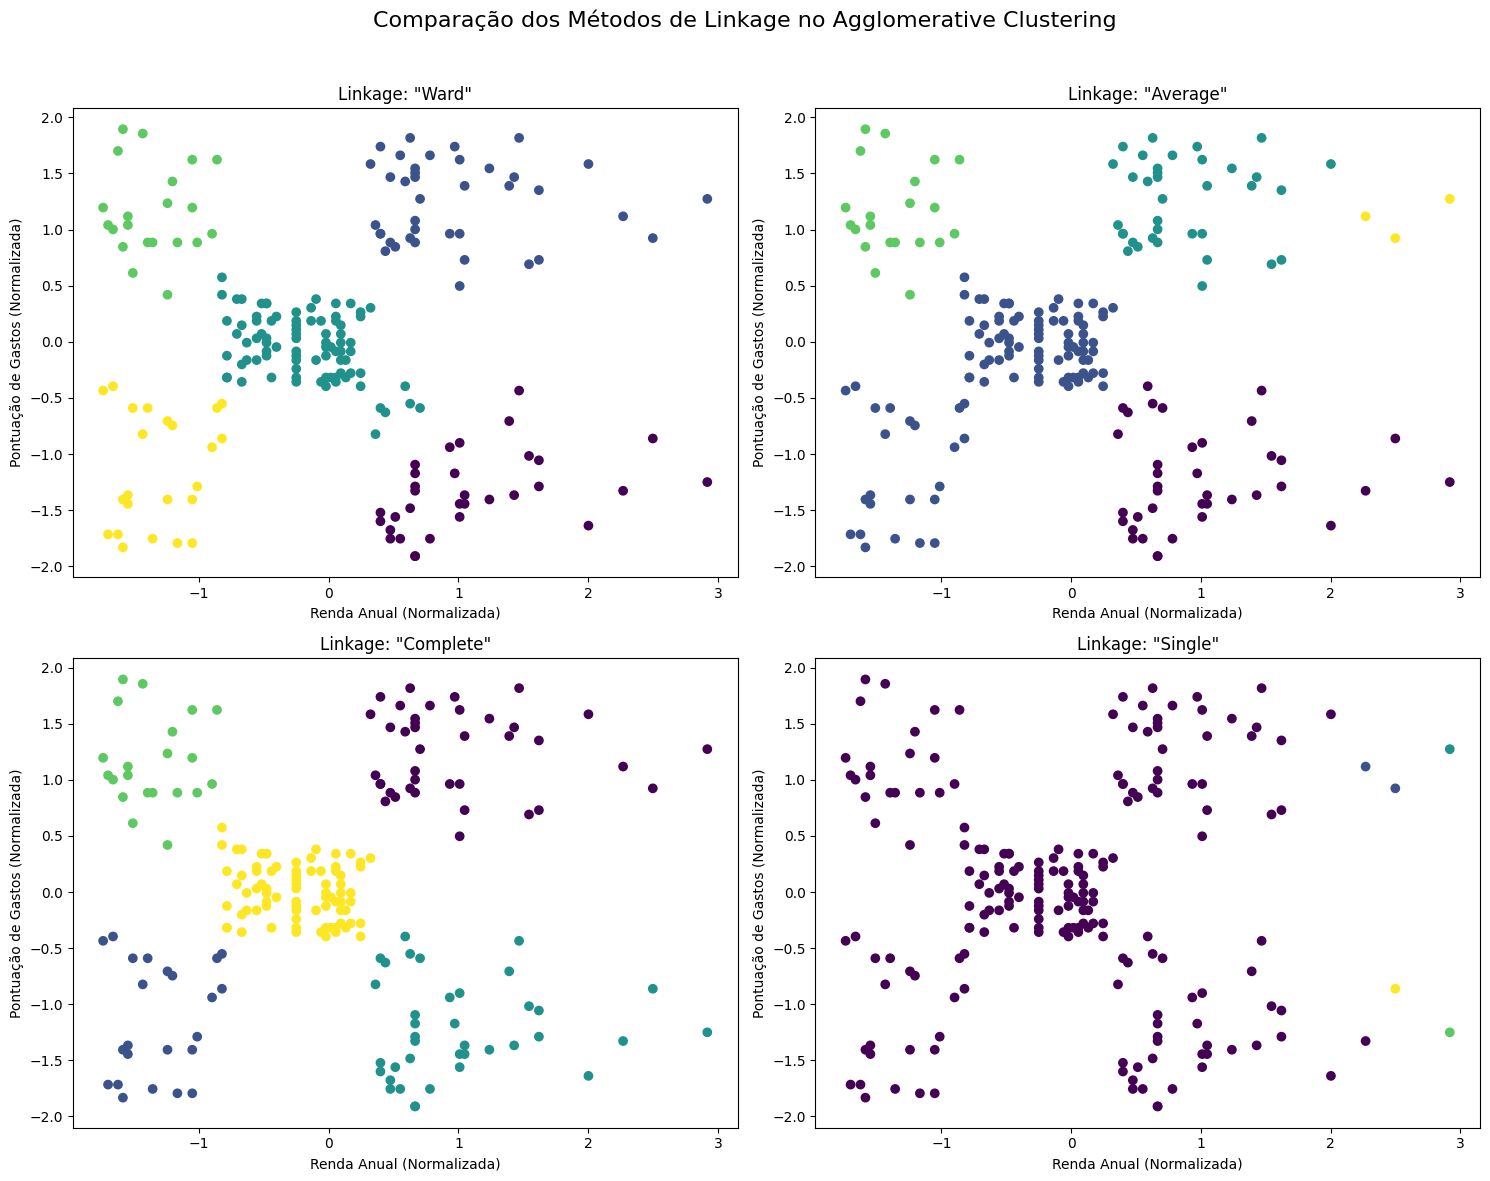

In [ ]:
# Lista com os métodos de linkage que vamos testar
linkage_methods = ['ward', 'average', 'complete', 'single']

# Cria uma figura com subplots (2 linhas, 2 colunas) para os gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# Transforma o array 2x2 de eixos em um array linear para facilitar o loop
axes = axes.ravel()

# Itera sobre cada método de linkage para criar um gráfico
for i, method in enumerate(linkage_methods):
    # Instancia e treina o modelo de Agglomerative Clustering
    agg_cluster = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels = agg_cluster.fit_predict(X_scaled)

    # Plota o resultado no subplot correspondente
    ax = axes[i]
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
    ax.set_title(f'Linkage: "{method.capitalize()}"')
    ax.set_xlabel('Renda Anual (Normalizada)')
    ax.set_ylabel('Pontuação de Gastos (Normalizada)')

plt.suptitle('Comparação dos Métodos de Linkage no Agglomerative Clustering', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#Questão 5
Avalie os resultados obtidos na questão 4 por meio de dendrogramas. Apresente os resultados.

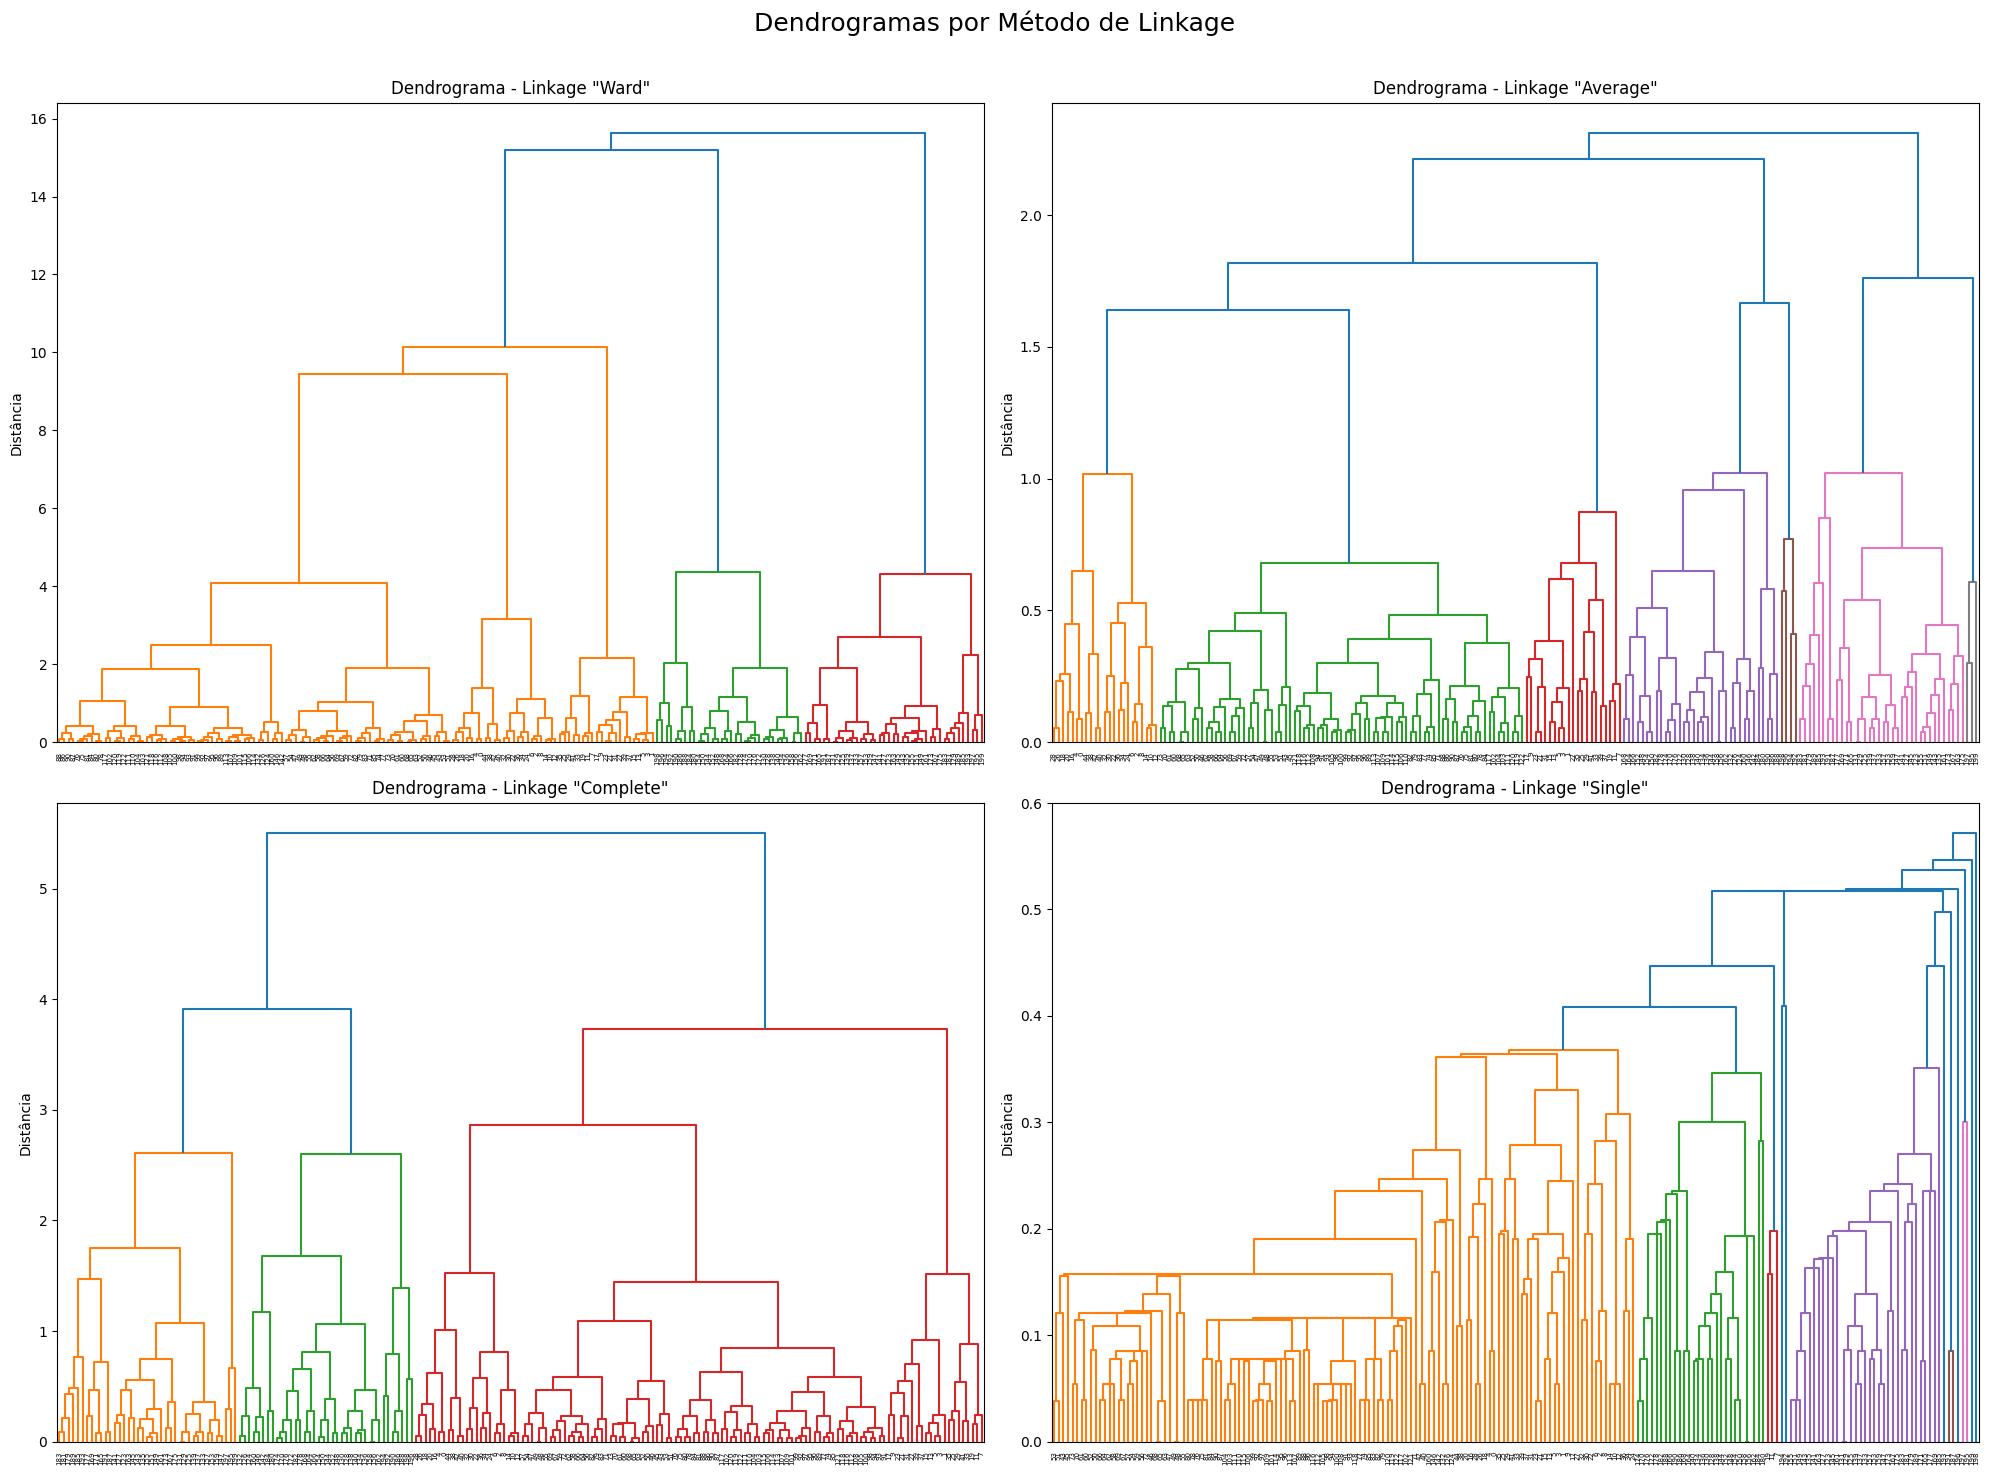

In [ ]:
# Cria uma figura com subplots (2 linhas, 2 colunas) para os gráficos
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

# Itera sobre cada método de linkage para criar um dendrograma
for i, method in enumerate(linkage_methods):
    ax = axes[i]

    # Calcula a matriz de linkage
    linked = linkage(X_scaled, method=method)

    # Plota o dendrograma no subplot correspondente
    dendrogram(linked,
               ax=ax,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)

    ax.set_title(f'Dendrograma - Linkage "{method.capitalize()}"')
    ax.set_ylabel('Distância')

plt.suptitle('Dendrogramas por Método de Linkage', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#Questão 6
Associe o dendrograma da questão anterior a um mapa de calor. Apresente os resultados.

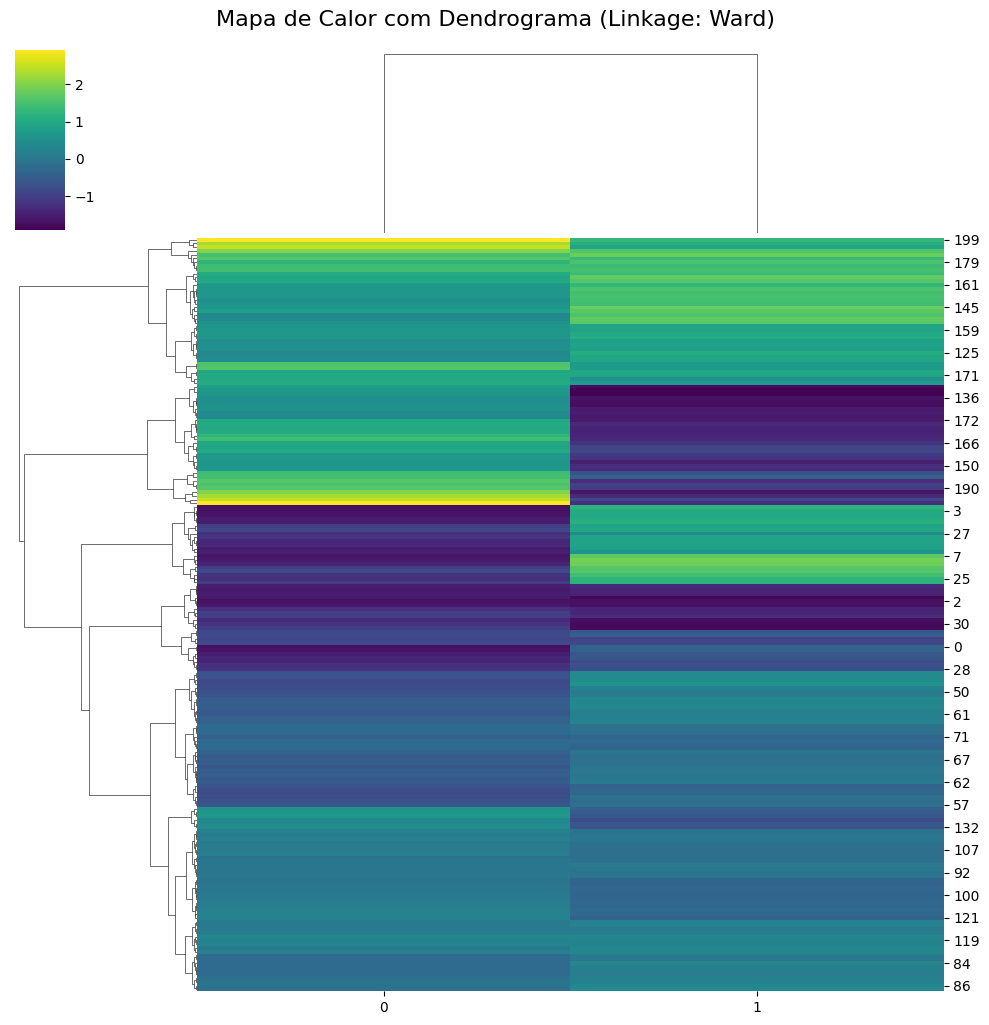

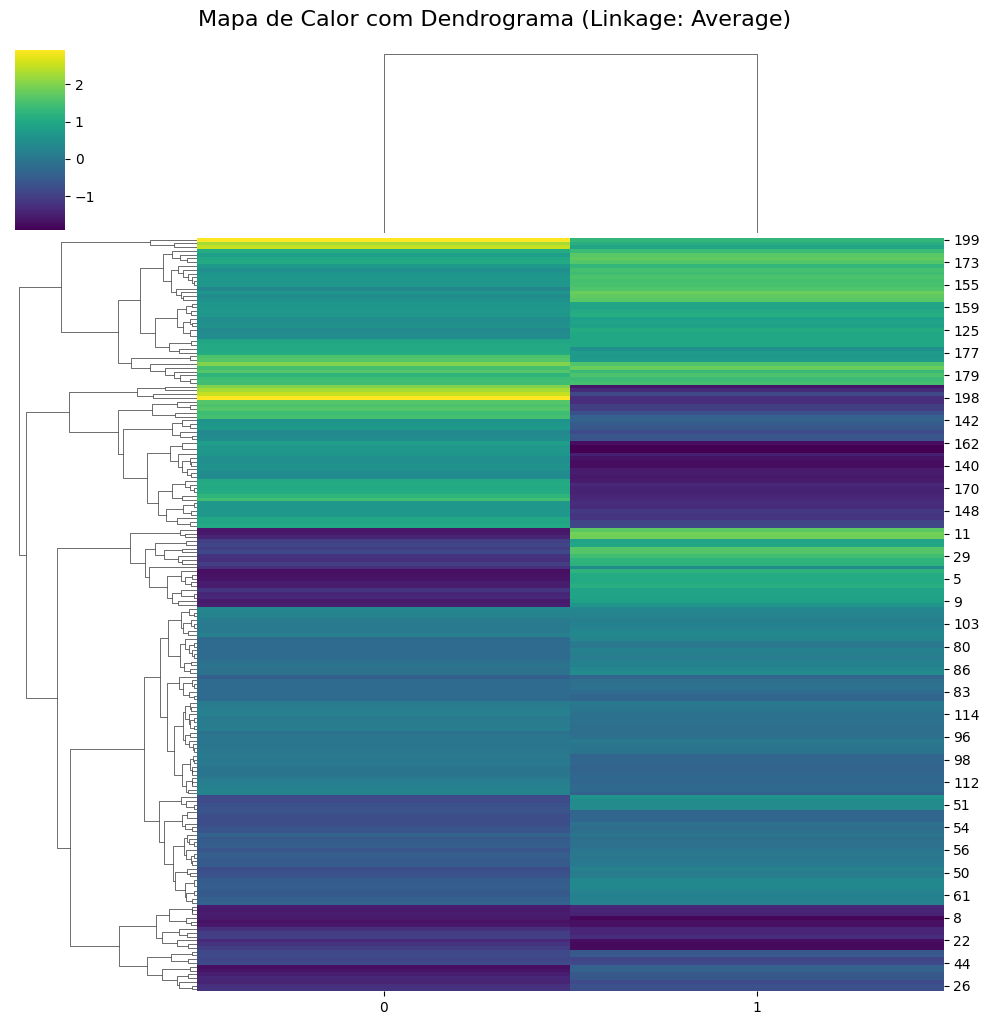

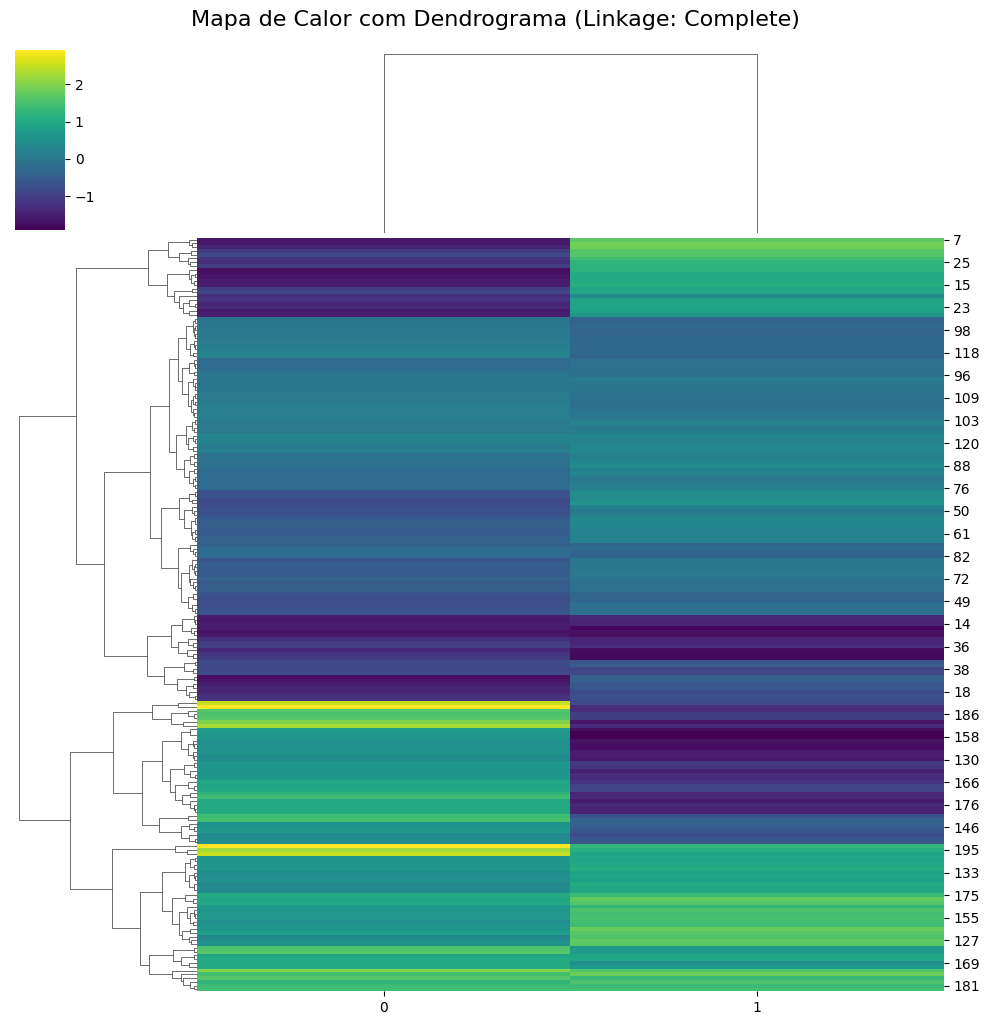

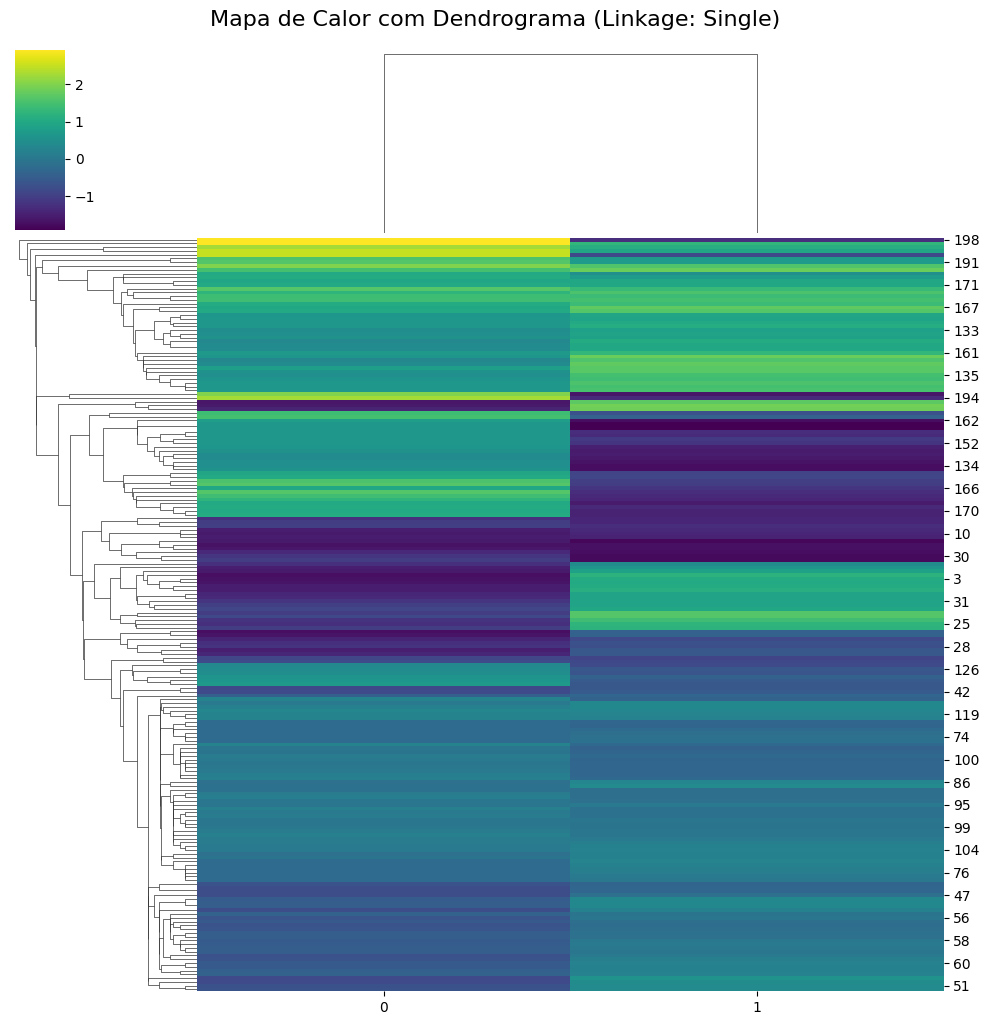

In [ ]:
# Gerar o Clustermap

method = ['ward','average', 'complete', 'single']
for i in method:
    sns.clustermap(X_scaled,
               method=i,
               cmap='viridis',     # Paleta de cores
               figsize=(10, 10))
    plt.suptitle(f'Mapa de Calor com Dendrograma (Linkage: {i.capitalize()})', fontsize=16, y=1.02)
    plt.show()

#Questão 7
 DBSCAN: make_swiss_roll

Aplique o DBSCAN para encontrar agrupamentos no dataset make_swiss_roll. Determine os valores ideais para os parâmetros eps e min_samples do algoritmo. (Você pode comparar os efeitos das variações nos parâmetros nos resultados obtidos pelo DBSCAN usando um heatmap.) Apresente os resultados.

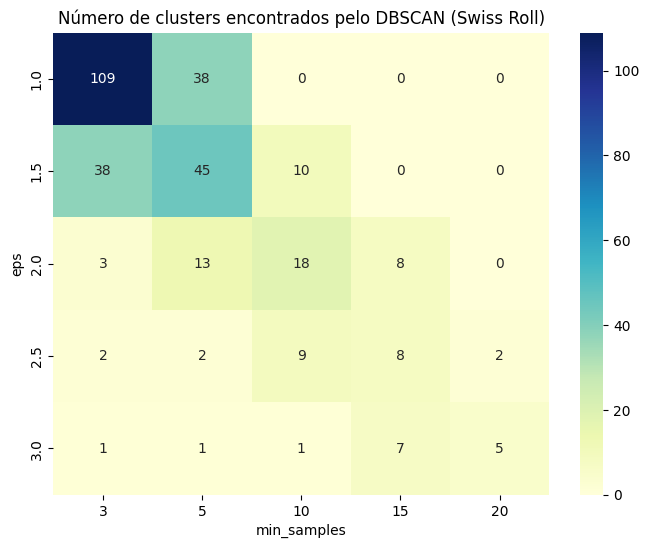

In [ ]:
# Gerando dataset Swiss Roll
X, _ = make_swiss_roll(n_samples=1000, noise=0.05, random_state=42)

# Definindo intervalos de eps e min_samples para testar
eps_values = [1.0, 1.5, 2.0, 2.5, 3.0]
min_samples_values = [3, 5, 10, 15, 20]

results = np.zeros((len(eps_values), len(min_samples_values)))

# Rodando DBSCAN para cada combinação
for i, eps in enumerate(eps_values):
    for j, min_s in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        results[i, j] = n_clusters

# Plotando heatmap do número de clusters encontrados
plt.figure(figsize=(8,6))
sns.heatmap(results, annot=True, fmt=".0f", xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu")
plt.title("Número de clusters encontrados pelo DBSCAN (Swiss Roll)")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()



#Questão 8
DBSCAN: Mall Customer Segmentation Data

Aplique o DBSCAN sobre o dataset Mall Customer Segmentation Data.


=== Mall Customers ===


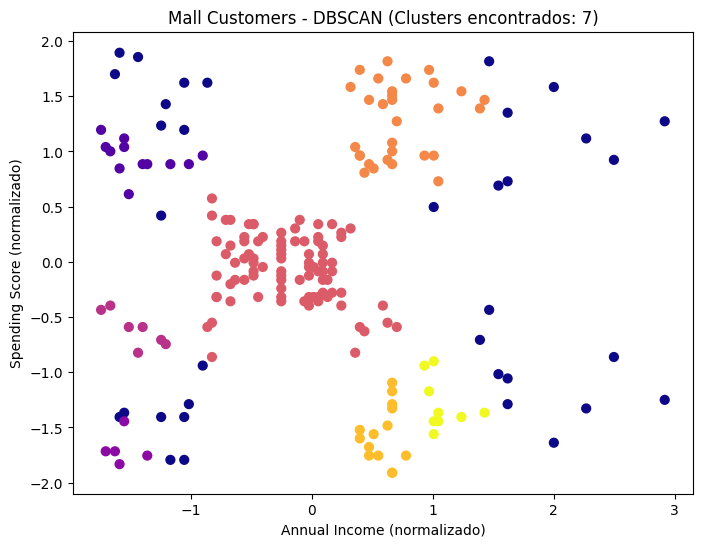

7

In [ ]:
print("\n=== Mall Customers ===")
#print(df_mall.head())

# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Número de clusters (ignora ruído)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Plotando os clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap="plasma", s=40)
plt.title(f"Mall Customers - DBSCAN (Clusters encontrados: {n_clusters})")
plt.xlabel("Annual Income (normalizado)")
plt.ylabel("Spending Score (normalizado)")
plt.show()

n_clusters

#Questão 9
 Comparação de Algoritmos

Compare os resultados obtidos nas questões 2, 4(a) e 8 usando ARI, NMI e silhouette coeficiente.

In [ ]:
# Avaliação e Comparação


# Rótulos do K-Means (já calculados)
labels_kmeans = df_mall["Cluster"]

# Rótulos do Agglomerative Clustering (usando 'ward')
agg_cluster_ward = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_agg = agg_cluster_ward.fit_predict(X_scaled)

# Rótulos do DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

ari_kmeans_agg = adjusted_rand_score(labels_kmeans, labels_agg)
nmi_kmeans_agg = normalized_mutual_info_score(labels_kmeans, labels_agg)
print("ARI KMeans vs Agglomerative:", ari_kmeans_agg)
print("NMI KMeans vs Agglomerative:", nmi_kmeans_agg)

# Comparar Agglomerative com DBSCAN (removendo ruído do DBSCAN)
mask_db = labels_dbscan != -1
ari_agg_db = adjusted_rand_score(labels_agg[mask_db], labels_dbscan[mask_db])
nmi_agg_db = normalized_mutual_info_score(labels_agg[mask_db], labels_dbscan[mask_db])
print("\nARI Agglomerative vs DBSCAN:", ari_agg_db)
print("NMI Agglomerative vs DBSCAN:", nmi_agg_db)

sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
sil_agg = silhouette_score(X_scaled, labels_agg)
# DBSCAN ignora pontos de ruído (-1) para Silhouette
mask = labels_dbscan != -1
sil_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])

print("Silhouette KMeans:", sil_kmeans)
print("Silhouette Agglomerative:", sil_agg)
print("Silhouette DBSCAN:", sil_dbscan)

ARI KMeans vs Agglomerative: 0.9419606318143182
NMI KMeans vs Agglomerative: 0.9444589708214342

ARI Agglomerative vs DBSCAN: 0.2769093787198917
NMI Agglomerative vs DBSCAN: 0.49389279865367913
Silhouette KMeans: 0.5546571631111091
Silhouette Agglomerative: 0.5538089226688662
Silhouette DBSCAN: 0.3875583892728279


#Questão 10
Clustering: Olivetti Faces

Aplique os algoritmos DBSCAN, k-means e Agglometarive Clustering sobre o dataset Olivetti faces. Apresente os resultados.

Resposta:

 o Agglomerative Clustering demonstrou ser o algoritmo mais eficaz, seguido de perto pelo K-Means.

O DBSCAN, por ser um algoritmo baseado em densidade, mostrou-se inadequado para a estrutura deste dataset com os parâmetros testados e exigiria um ajuste mais fino (ou uma abordagem diferente) para produzir resultados significativos.

Recomendação: Para problemas semelhantes que exigem um número fixo de agrupamentos, tanto o Agglomerative Clustering quanto o K-Means são as escolhas recomendadas.

In [ ]:
# 1. Carregar e preparar os dados
olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target # Rótulos verdadeiros para avaliação


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Aplicar os algoritmos de Clusterização

# K-Means (40 clusters, pois há 40 pessoas diferentes)
kmeans = KMeans(n_clusters=40, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Agglomerative Clustering (também com 40 clusters)
agg = AgglomerativeClustering(n_clusters=40)
agg_labels = agg.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=6.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 3. Apresentar os Resultados (Métricas de Avaliação)

# Score de Silhueta
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
agg_silhouette = silhouette_score(X_scaled, agg_labels)

# Adjusted Rand Index (ARI)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
agg_ari = adjusted_rand_score(y, agg_labels)

print("--- Resultados da Clusterização no Dataset Olivetti Faces ---")
print("\n--- K-Means ---")
print(f"Score de Silhueta: {kmeans_silhouette:.4f}")
print(f"Adjusted Rand Index (ARI): {kmeans_ari:.4f}")


print("\n--- Agglomerative Clustering ---")
print(f"Score de Silhueta: {agg_silhouette:.4f}")
print(f"Adjusted Rand Index (ARI): {agg_ari:.4f}")


mask = dbscan_labels != -1
if np.sum(mask) > 1 and len(set(dbscan_labels[mask])) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    dbscan_ari = adjusted_rand_score(y[mask], dbscan_labels[mask])
else:
    dbscan_silhouette = -1
    dbscan_ari = -1

print("\n--- DBSCAN ---")
print(f"Score de Silhueta: {dbscan_silhouette:.4f}")
print(f"Adjusted Rand Index (ARI): {dbscan_ari:.4f}")

--- Resultados da Clusterização no Dataset Olivetti Faces ---

--- K-Means ---
Score de Silhueta: 0.1509
Adjusted Rand Index (ARI): 0.4523

--- Agglomerative Clustering ---
Score de Silhueta: 0.1698
Adjusted Rand Index (ARI): 0.5007

--- DBSCAN ---
Score de Silhueta: -1.0000
Adjusted Rand Index (ARI): -1.0000


#Questão 11
 Clustering e Tópicos: 20newsgroups

* Aplique o k-means sobre o dataset 20newsgroups. Apresente seus resultados.
* Determine tópicos no dataset 20newsgroup usando o algoritmo NMF. Apresente seus resultados.
* Determine tópicos no dataset 20newsgroup usando o algoritmo LDA. Apresente seus resultados.

In [ ]:
# Carregar dataset 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs = newsgroups.data

# Vetorização
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(docs)

count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_counts = count_vectorizer.fit_transform(docs)

# K-Means
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_tfidf)
labels = kmeans.labels_
silhouette = silhouette_score(X_tfidf, labels)
print(f"Silhouette Score K-Means: {silhouette:.3f}")

terms = tfidf_vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

clusters = []
for i in range(k):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    clusters.append(top_terms)

df_kmeans = pd.DataFrame(clusters, columns=[f"Term{i+1}" for i in range(10)])
df_kmeans.index.name = "Cluster"
print("\nK-Means Top Terms por Cluster:")
print(df_kmeans)

# NMF
n_topics = 20
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(X_tfidf)

topics_nmf = []
for topic in nmf.components_:
    top_words = [terms[i] for i in topic.argsort()[-10:]]
    topics_nmf.append(top_words)

df_nmf = pd.DataFrame(topics_nmf, columns=[f"Term{i+1}" for i in range(10)])
df_nmf.index.name = "Topic"
print("\nNMF Top Words por Tópico:")
print(df_nmf)

# LDA
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_counts)
count_terms = count_vectorizer.get_feature_names_out()

topics_lda = []
for topic in lda.components_:
    top_words = [count_terms[i] for i in topic.argsort()[-10:]]
    topics_lda.append(top_words)

df_lda = pd.DataFrame(topics_lda, columns=[f"Term{i+1}" for i in range(10)])
df_lda.index.name = "Topic"
print("\nLDA Top Words por Tópico:")
print(df_lda)


Silhouette Score K-Means: -0.008

K-Means Top Terms por Cluster:
               Term1        Term2          Term3         Term4        Term5  \
Cluster                                                                       
0             compaq        bytes  configuration       machine  diagnostics   
1         revelation       fatima        private      catholic      lourdes   
2             berlin           tu             __            30           49   
3          professor   university        history      genocide      general   
4               mice         sort            guy       dragon_      buddist   
5               game         team          games          year       hockey   
6               bios      upgrade       software          disk         gets   
7        antibiotics        colds          child      caroline      daycare   
8         processors      running        windows           030   benchmarks   
9             velcro        space         doubts          spin    

#Questão 12
t-SNE: MNIST Dataset

Aplique o algoritmo t-SNE sobre o MNIST dataset. Apresente os resultados obtidos.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


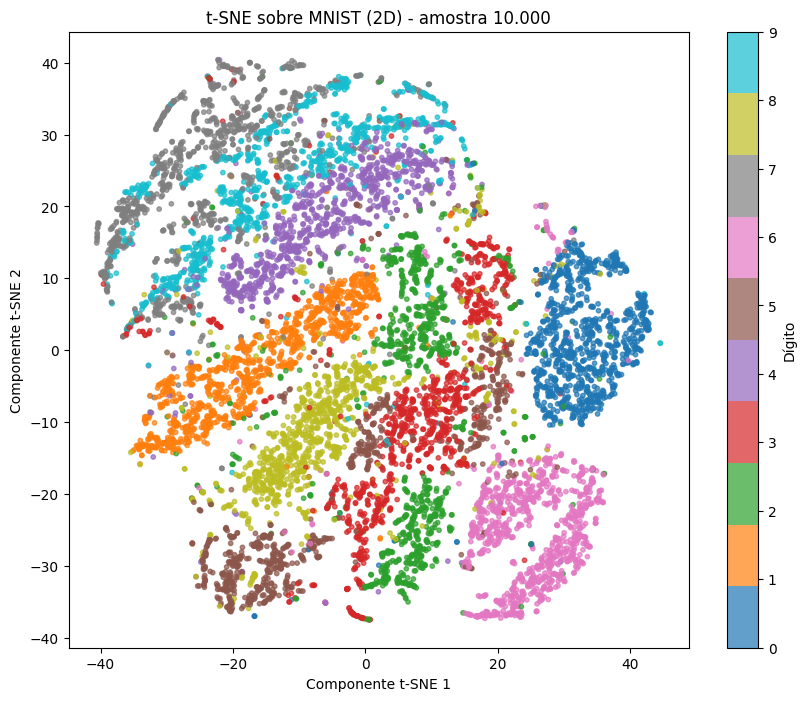

In [ ]:
# Carregar MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Usar amostra menor para t-SNE (10.000 imagens)
X_sample = X_scaled[:10000]
y_sample = y[:10000]

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_embedded = tsne.fit_transform(X_sample)

# Visualização
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_sample, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Dígito')
plt.title("t-SNE sobre MNIST (2D) - amostra 10.000")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()
